In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


In [100]:
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['percentage'] = pd.to_numeric(data['percentage'], errors='coerce')

In [101]:
data.isnull().sum()

region            0
category          0
parameter         0
mode              0
powertrain        0
year              0
unit              0
value          3233
percentage    12616
dtype: int64

In [102]:
data_filter = data[["year", "value"]].copy()
data_filter.dropna(inplace = True)

In [103]:
data_group = data_filter.groupby("year").sum().reset_index()
data_group

,year,value
0,2010,1.476500e+05
1,2011,3.925678e+05
2,2012,9.672260e+05
3,2013,1.786260e+06
4,2014,3.103352e+06
5,2015,5.739469e+06
6,2016,8.897489e+06
7,2017,1.357292e+07
8,2018,2.077595e+07
9,2019,2.733355e+07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


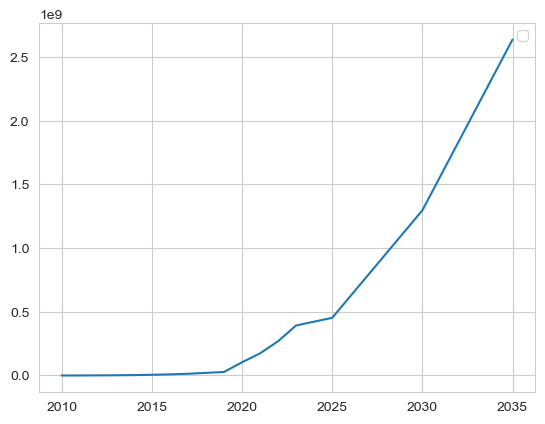

In [104]:
plt.plot(data_group["year"], data_group["value"])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


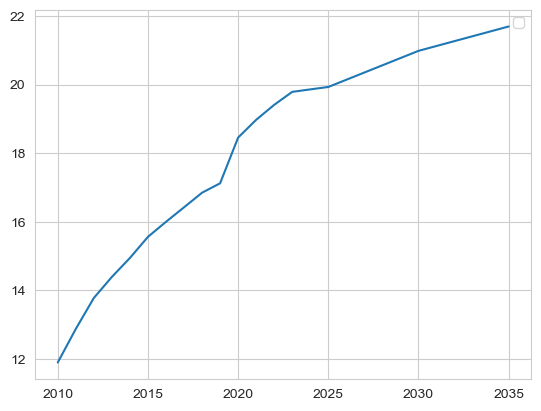

In [105]:
data_group["value"] = np.log(data_group["value"])
plt.plot(data_group["year"], data_group["value"])
plt.legend()    
plt.show()

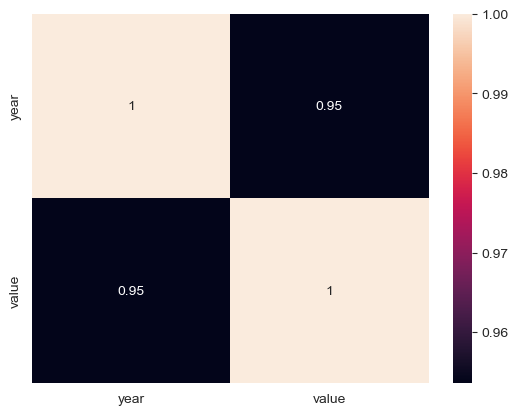

In [106]:
data_corr = data_group.corr()
sns.heatmap(data_corr, annot = True)
plt.show()

In [107]:
X = data_group[["year"]]
y = data_group["value"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [109]:
model = LinearRegression()
model_fit = model.fit(X_train, y_train)

In [110]:
y_predict = model_fit.predict(X_test)

In [111]:
mean_squared_error(y_test, y_predict), mean_squared_error(y_test, y_predict, squared = True), mean_absolute_error(y_test, y_predict)

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.44789899316853293, 0.44789899316853293, 0.48691444167255327)

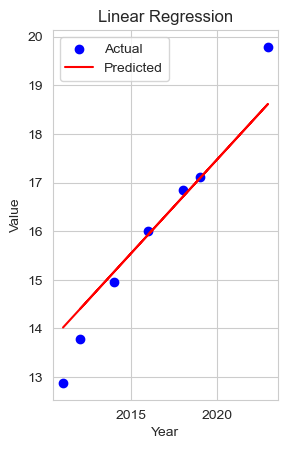

In [112]:
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_predict, color='red', label='Predicted')
plt.title("Linear Regression")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()

In [113]:
model = LinearRegression()
model_fit = model.fit(X_train, y_train)

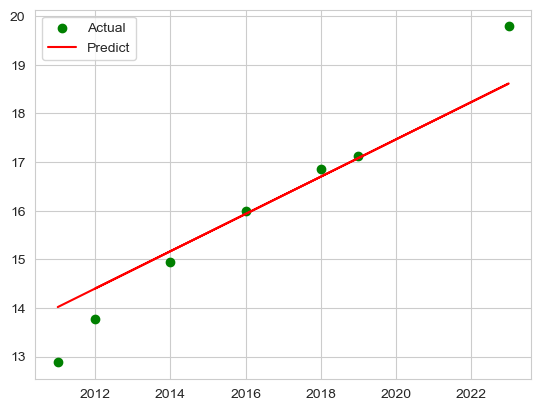

In [114]:
y_predict_test = model.predict(X_test)
plt.scatter(X_test, y_test, color = "green", label = "Actual")
plt.plot(X_test, y_predict_test, color = "red", label = "Predict")
plt.legend()
plt.show()

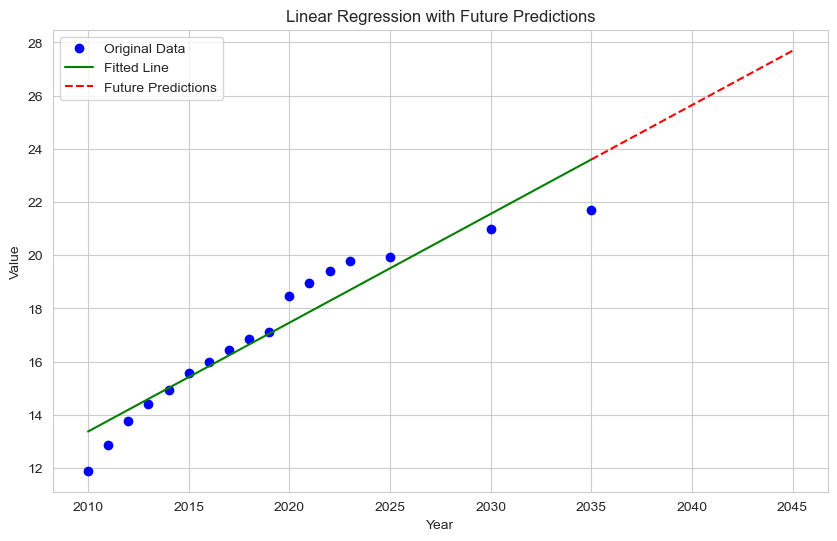

In [117]:
data_year = pd.DataFrame({'year': [2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045]})
future_predictions = model.predict(data_year)

future_data = data_year.copy()
future_data['predicted_value'] = future_predictions

plt.figure(figsize=(10, 6))

plt.scatter(data_group['year'], data_group['value'], color='blue', label='Original Data')
plt.plot(data_group['year'], model.predict(X), color='green', label='Fitted Line')
plt.plot(data_year['year'], future_predictions, color='red', linestyle='--', label='Future Predictions')

plt.title("Linear Regression with Future Predictions")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()


In [119]:
model_fit.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'